In [1]:
import numpy as np
import corner as corner
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.patches as mpatches

In [2]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] ='serif'


In [3]:
prior_data_directory = '../results/prior/'
posterior_data_directory = '../results/posterior/NICER_Real_Data/NICER_REAL_ADM_VARYING_BARYONIC/'

plots_directory = '../plots/' 

run_name = 'FERMIONIC_REAL_DATA_POSTERIOR_PRIOR_'

In [4]:
tmp = np.loadtxt(prior_data_directory + 'FERMIONIC_REAL_DATA_PRIOR_post_equal_weights.dat')
print('Generating the prior corner plot')


Matrix_prior = np.zeros((len(tmp),3))

#m_chi = tmp[:,5]
#g_chi = tmp[:,6]
#F_chi = tmp[:,7]

for i in range(len(tmp)):
    Matrix_prior[i] =np.log10(tmp[:,5][i]),np.log10(tmp[:,6][i]),tmp[:,7][i]

Generating the prior corner plot


Generating the posterior corner plot


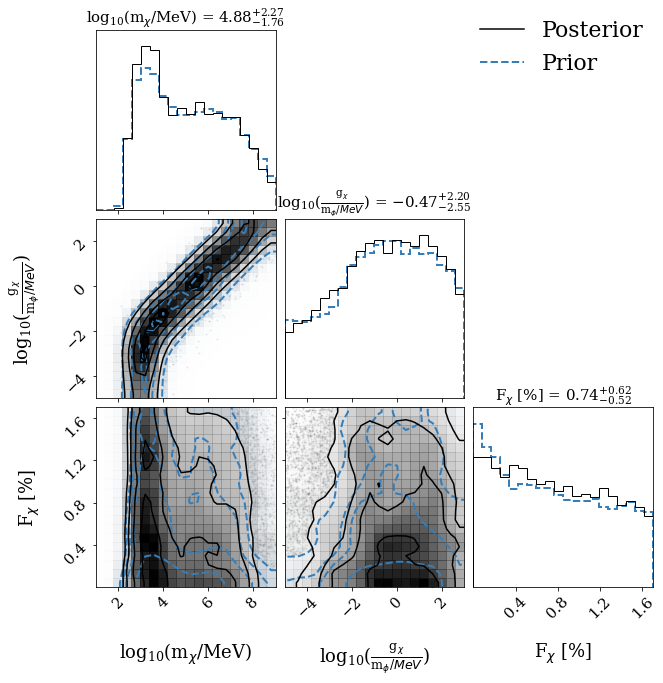

In [5]:
print('Generating the posterior corner plot')

ewposterior = np.loadtxt(posterior_data_directory + 'NICER_REAL_ADM_VARYING_BARYONIC_post_equal_weights.dat')



mchi = ewposterior[:,5]
gchi_over_mphi = ewposterior[:,6]
Fchi = ewposterior[:,7]

Matrix = np.zeros((len(mchi),3))
for i in range(len(mchi)):
    Matrix[i] =np.log10(mchi[i]),np.log10(gchi_over_mphi[i]),Fchi[i]

    
    
ell = corner.corner(Matrix_prior,smooth = 1.0,color = '#377eb8',group = 'prior',range = [(1,9),(-5,3),(0,1.7)],
                   plot_datapoints = False,plot_density = True,plot_contours = True,divergences = False,
                    hist_kwargs = {'linestyle': '--','linewidth': 2.0}, contour_kwargs = {'linestyles':'dashed','linewidths': 2.0})


figure = corner.corner(Matrix,smooth = 1.0,fig = ell,labels = [r"log$_{10}$(m$_\chi$/MeV)",r"log$_{10}$($\frac{\mathdefault{g}_\chi}{\mathdefault{m}_\phi/MeV})$",r"F$_\chi$ [%]"],
                      range = [(1,9),(-5,3),(0,1.7)], show_titles = True,label_kwargs = {"fontsize":18,"font":'serif'},title_kwargs = {"fontsize":15})
figure.subplots_adjust(right=1.15,top=1.15)


figure.subplots_adjust(right=1.15,top=1.15)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15) 
    
figure.legend(handles =[plt.lines.Line2D([],[],color = 'black',label = 'Posterior'),
                        plt.lines.Line2D([],[],color = '#377eb8',label = 'Prior',linestyle = '--',lw = 2.0)],
                  fontsize = 22,frameon = False,loc = "upper right")



figure.savefig(plots_directory + run_name + 'Corner.png',bbox_inches='tight')

In [6]:
mchi_prior = tmp[:,5]
gchi_over_mphi_prior = tmp[:,6]
Fchi_prior = tmp[:,7]

In [7]:
matrix = np.zeros((len(mchi),2))
for i in range(len(matrix)):
    matrix[i] = np.log10(gchi_over_mphi[i]/mchi[i]),Fchi[i]
    
matrixp = np.zeros((len(mchi_prior),2))
for i in range(len(matrixp)):
    matrixp[i] = np.log10(gchi_over_mphi_prior[i]/mchi_prior[i]),Fchi_prior[i]

In [8]:
def get_quantiles(array, quantiles=[0.05, 0.5, 0.95]): #0.05,0.5,0.95 0.16,0.5,0.84
        contours = np.nanquantile(array, quantiles) #changed to nanquantile to inorder to ignore the nans that may appear
        low = contours[0]
        median = contours[1]
        high = contours[2]
        minus = low - median
        plus = high - median
        return np.round(median,2),np.round(plus,2),np.round(minus,2) 

In [9]:
print('Posteriors 68% ', get_quantiles(matrixp[:,0], quantiles = [0.16,0.5,0.84]) )
print('Posteriors 95% ', get_quantiles(matrixp[:,0]) )

Posteriors 68%  (-5.7, 1.08, -1.17)
Posteriors 95%  (-5.7, 1.49, -1.91)


In [10]:
print('Posteriors 68% ', get_quantiles(matrix[:,0], quantiles = [0.16,0.5,0.84]) )
print('Posteriors 95% ', get_quantiles(matrix[:,0]) )

Posteriors 68%  (-5.62, 0.97, -0.97)
Posteriors 95%  (-5.62, 1.36, -1.75)


In [11]:
pyplot.rcParams['xtick.direction'] = 'in'
pyplot.rcParams['xtick.minor.visible'] = True
pyplot.rcParams['ytick.direction'] = 'in'
pyplot.rcParams['ytick.minor.visible'] = True
pyplot.rcParams['xtick.major.size'] = 5
pyplot.rcParams['ytick.major.size'] = 5
pyplot.rcParams['ytick.right'] = True
pyplot.rcParams['xtick.top'] = True 

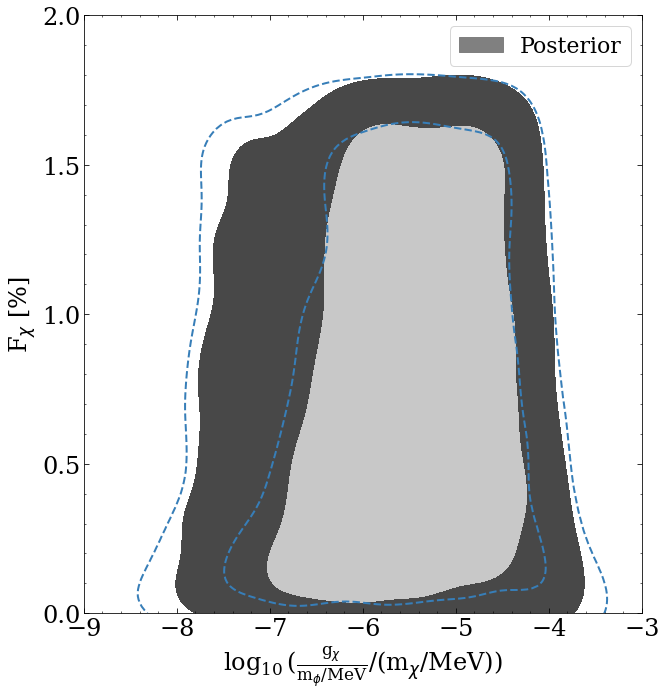

In [12]:
fig,ax = pyplot.subplots(figsize = (10,11))

plot = sns.kdeplot(data = matrix,x = matrix[:,0],y = matrix[:,1],shade = True,cbar = False,cmap = 'gray'
                   ,common_norm = True,levels=[0.05,0.32,1.],ax = ax)



plot_prior = sns.kdeplot(data = matrixp,x = matrixp[:,0],y = matrixp[:,1],shade = False,cbar = False,
                   colors = '#377eb8',common_norm = True,levels =[0.05,0.32,1],label = "Prior", linestyles = 'dashed',
                        linewidths = 2.,ax = ax)

plot.figure.axes[-1].yaxis.label.set_size(24)
plot.figure.axes[-1].xaxis.label.set_size(24)
plot.figure.axes[-1].tick_params(labelsize=24)
ax.set_ylabel(r"F$_\chi$ [$\%$]",font = 'serif',size = 24)
ax.set_xlabel(r"$\log_{10}(\frac{\mathdefault{g}_\chi}{\mathdefault{m}_\phi/\mathrm{MeV}}/(\mathdefault{m}_\chi/\mathrm{MeV}))$",font = 'serif',size =24)
ax.tick_params(axis='both', which='major', labelsize=24)


ax.legend(handles =[mpatches.Patch(color = 'Grey',label = 'Posterior')],
                 fontsize = 22,frameon = True,loc = "upper right")



ax.set_yticks([0,0.5,1.,1.5,2.])
ax.set_xticks([-9,-8,-7,-6,-5,-4,-3])
ax.set_ylim(0.0,2.)
ax.set_xlim(-9,-3)
ax.tick_params(labelsize=24)
ax.minorticks_on()



figure.savefig(plots_directory + run_name + 'ratio_plot.png',bbox_inches='tight')